In [27]:
import pandas as pd
df=pd.read_csv('heart.csv')
print(df.isnull().sum())
df.isnull()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
def convert_to_bool(value) -> bool:
 if value==0:
  return False
 if value==1:
  return True
df['HeartDisease'] = df['HeartDisease'].apply(convert_to_bool)

df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,False
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,True
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,False
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,True
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,True
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,True
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,True
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,True


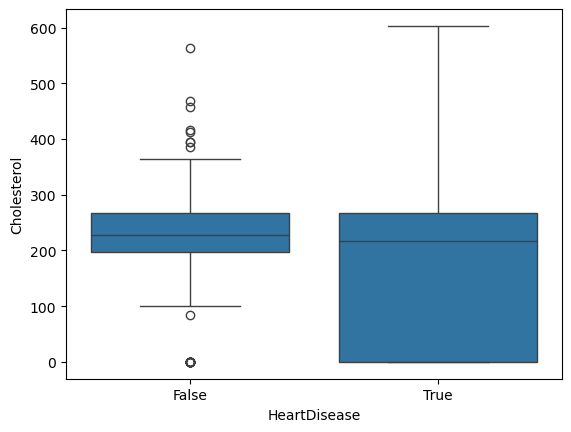

In [31]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
a1=sns.boxplot(data=df,x='HeartDisease',y='Cholesterol')




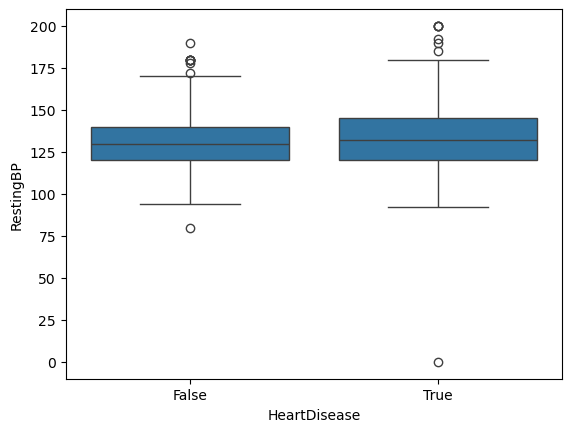

In [33]:
import seaborn as sns



a1=sns.boxplot(df,x='HeartDisease',y='RestingBP')


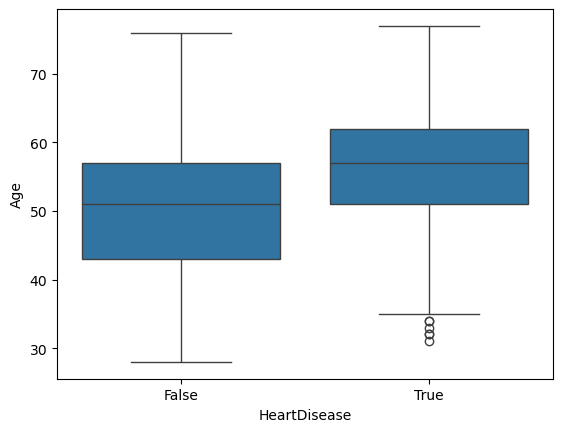

In [35]:
import seaborn as sns

a1=sns.boxplot(data=df,x='HeartDisease',y='Age')




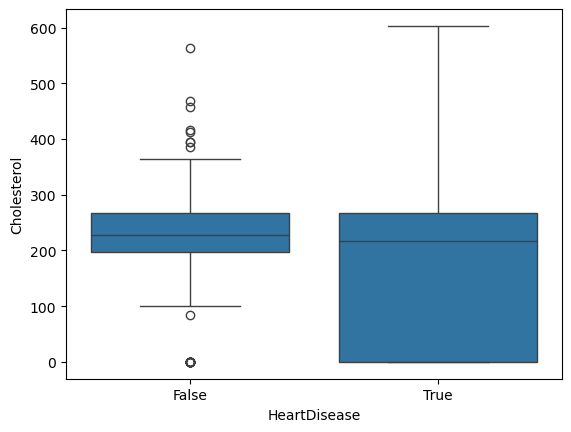

In [37]:
#Remove unreasonable outliers

df = df[(df.RestingBP != 0) | (df.Cholesterol !=0)]
a1=sns.boxplot(data=df,x='HeartDisease',y='Cholesterol')


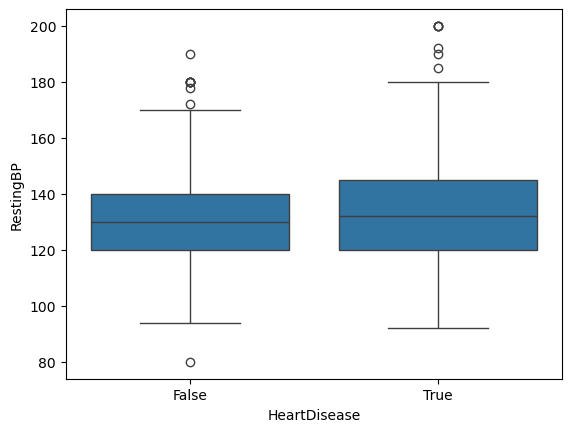

In [38]:
a1=sns.boxplot(df,x='HeartDisease',y='RestingBP')

RestingECG
Normal    284
ST        117
LVH       106
Name: count, dtype: int64
  RestingECG  count
0     Normal    284
1         ST    117
2        LVH    106
<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='ecg', ylabel='count'>

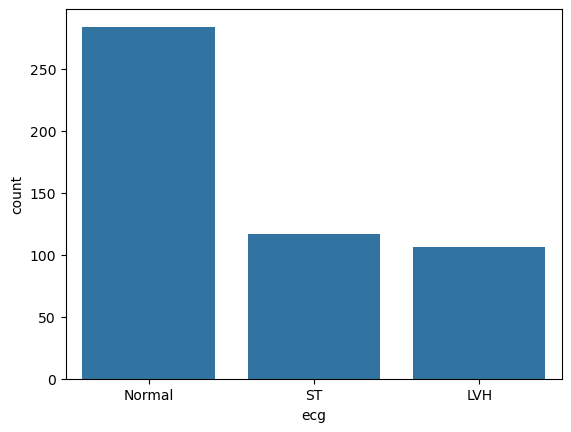

In [41]:
import seaborn as sns
df_true = df[df['HeartDisease']==True]
ecg_counts = df_true['RestingECG'].value_counts()
print(ecg_counts)
ecg_counts_df = ecg_counts.reset_index()
print(ecg_counts_df)
print(type(ecg_counts_df))
ecg_counts_df.columns = ['ecg', 'count']
sns.barplot(x='ecg', y='count', data=ecg_counts_df)


<Axes: xlabel='chestpain', ylabel='count'>

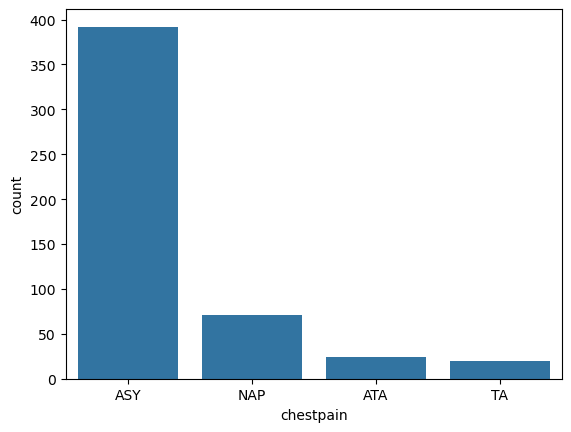

In [42]:
import seaborn as sns
df_true = df[df['HeartDisease'] == True]
chestpain_counts = df_true['ChestPainType'].value_counts()
chestpain_counts_df = chestpain_counts.reset_index()
chestpain_counts_df.columns = ['chestpain', 'count']
sns.barplot(x='chestpain', y='count', data=chestpain_counts_df)


In [44]:





import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,f1_score,classification_report



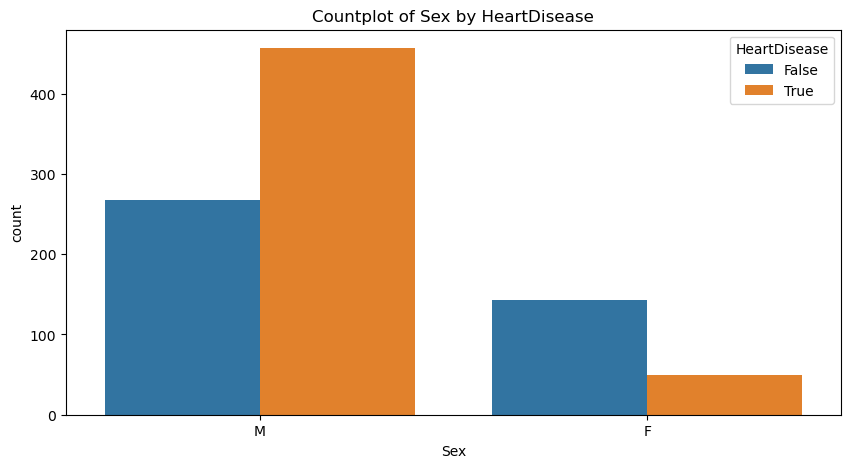

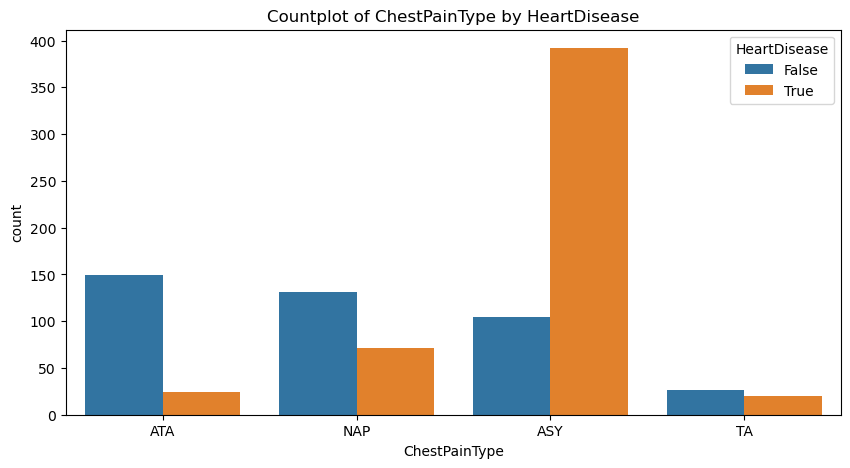

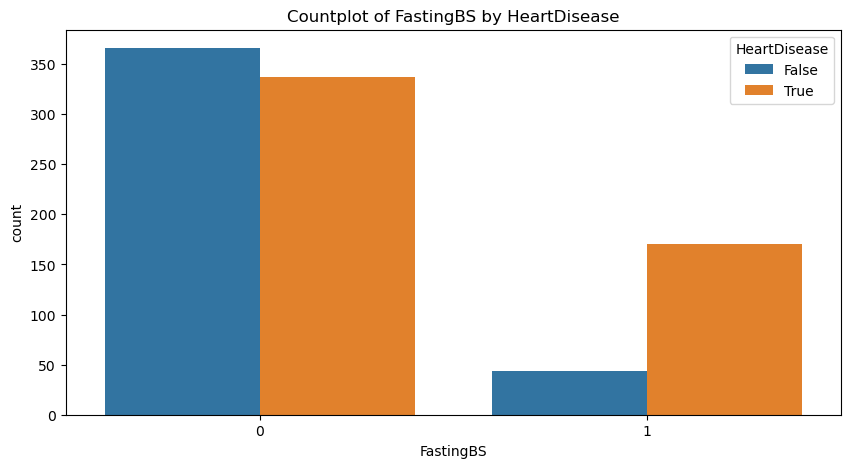

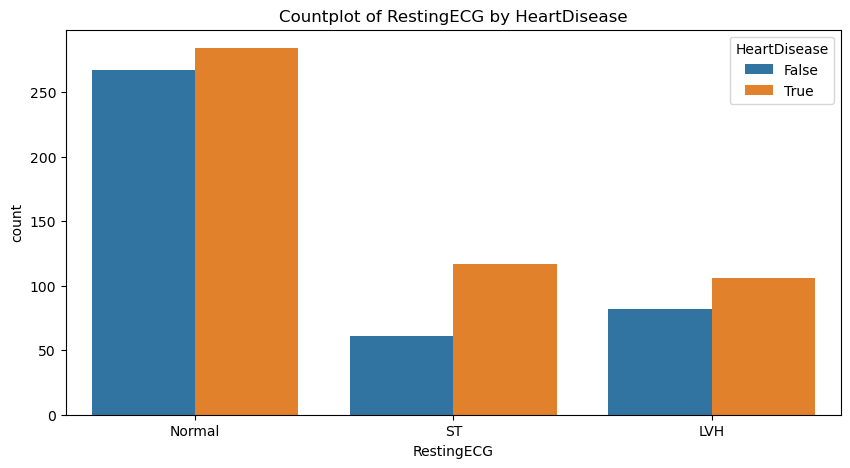

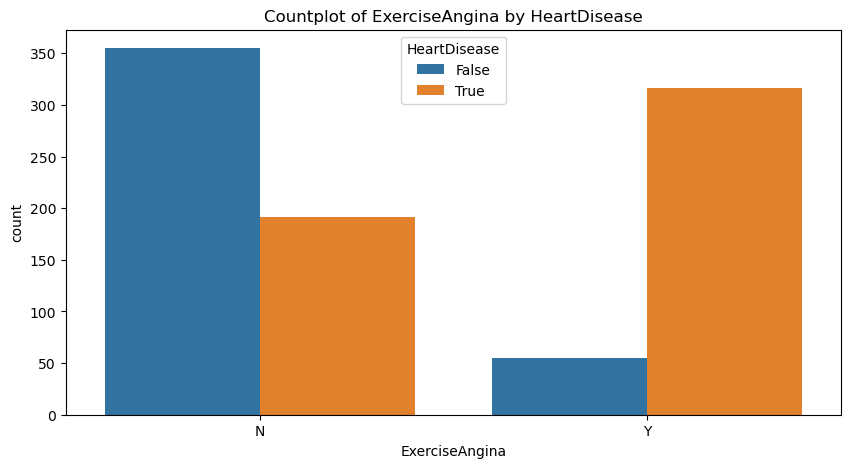

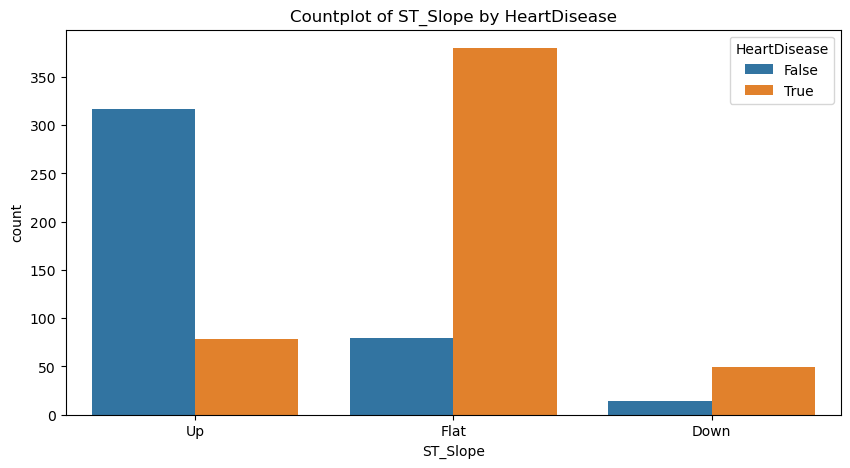

In [46]:


categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create histograms for categorical columns
for y in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=y, hue='HeartDisease')
    plt.title(f'Countplot of {y} by HeartDisease')
    plt.show()



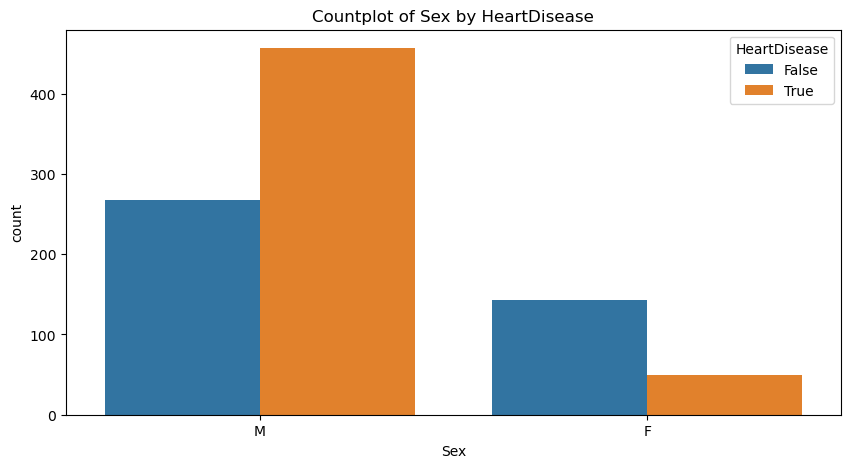

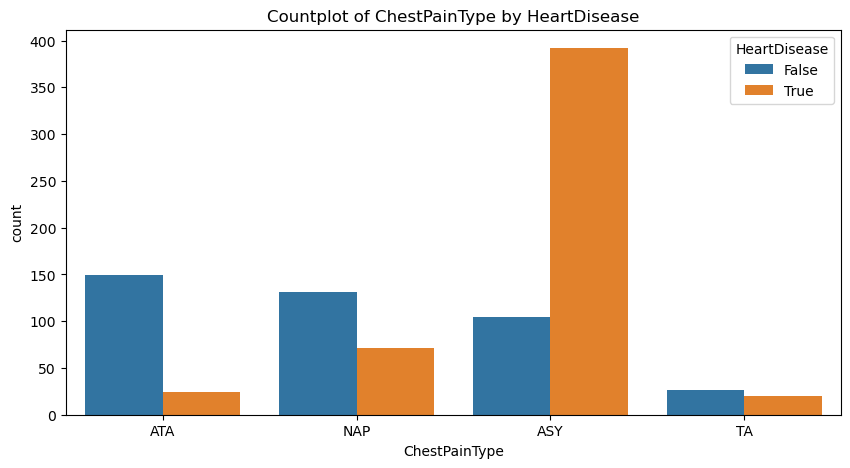

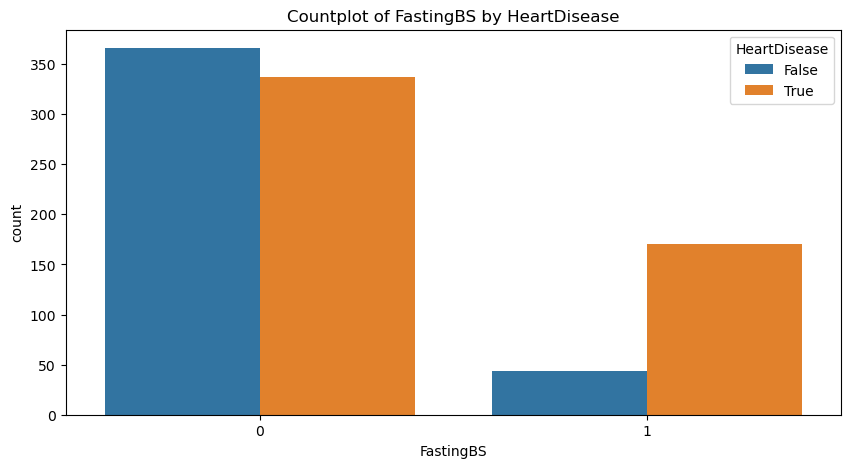

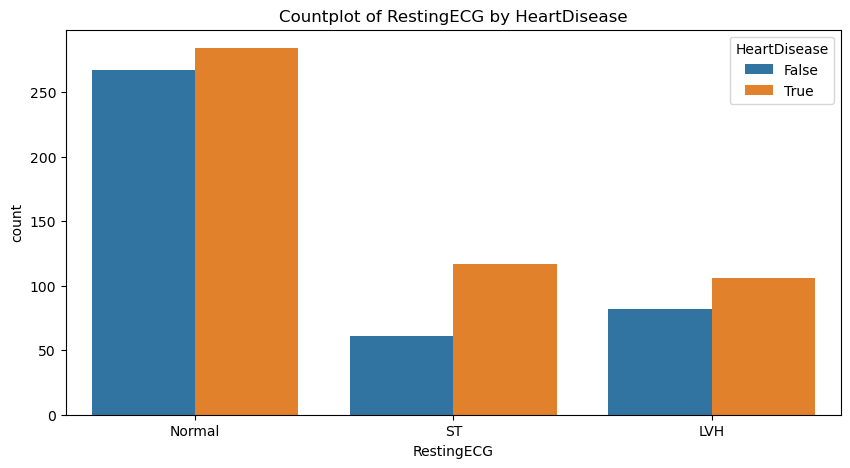

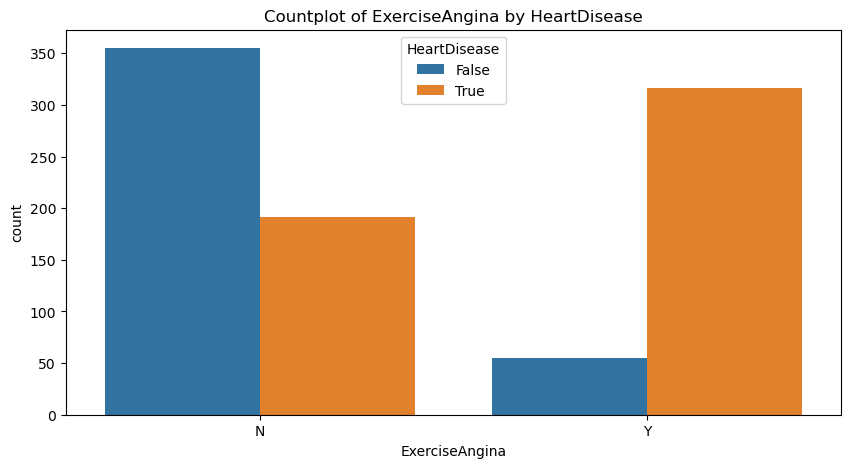

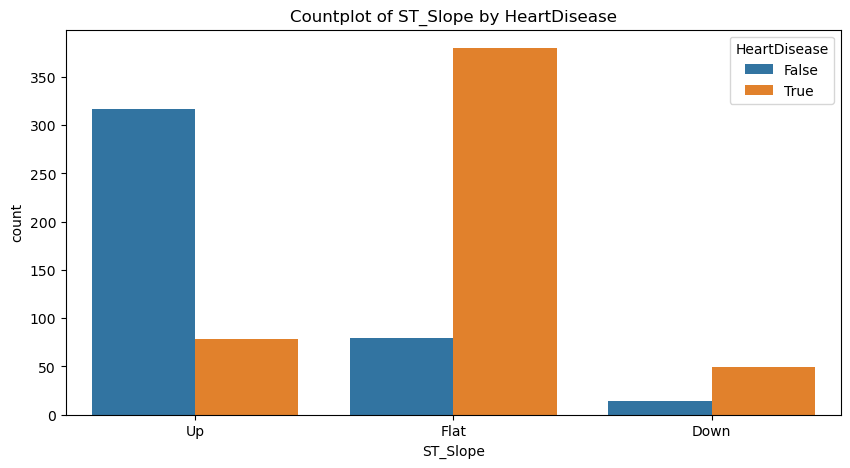

In [47]:


categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create histograms for categorical columns
for y in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=y, hue='HeartDisease')
    plt.title(f'Countplot of {y} by HeartDisease')
    plt.show()



In [48]:

X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print(X_train, X_test)




     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
161   49        128          212          0     96      0.0   True   
604   68        134          254          1    151      0.0   True   
659   59        126          218          1    134      2.2   True   
793   67        125          254          1    163      0.2   True   
140   52        160          331          0     94      2.5   True   
..   ...        ...          ...        ...    ...      ...    ...   
276   51        135          160          0    150      2.0   True   
201   46        120          230          0    150      0.0   True   
464   59        131            0          0    128      2.0   True   
252   61        125          292          0    115      0.0   True   
62    45        140          224          0    144      0.0   True   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
161              False              False             False   
604              False           

In [49]:

smote=SMOTE(random_state=42)
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)
print(Y_train.value_counts())
print(Y_train_smote.value_counts())
logreg=LogisticRegression(max_iter=180)
logreg.fit(X_train_smote,Y_train_smote)
logregpred=logreg.predict(X_test)
print(confusion_matrix(Y_test,logregpred))
print(f1_score(Y_test,logregpred))
print(classification_report(Y_test,logregpred))


HeartDisease
True     405
False    328
Name: count, dtype: int64
HeartDisease
True     405
False    405
Name: count, dtype: int64
[[69 13]
 [ 9 93]]
0.8942307692307693
              precision    recall  f1-score   support

       False       0.88      0.84      0.86        82
        True       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



C:\Users\Sid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
pred_proba_df = pd.DataFrame(logreg.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print (' For i = {}'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)  
    f1_accuracy = f1_score(Y_test.values.reshape(Y_test.values.size,1),Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1))
    print(confusion_matrix(Y_test.values.reshape(Y_test.values.size,1),Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1)))
    print('Our f1 score is {}'.format(f1_accuracy))

 For i = 0.05
[[ 24  58]
 [  1 101]]
Our f1 score is 0.7739463601532567
 For i = 0.1
[[ 43  39]
 [  2 100]]
Our f1 score is 0.8298755186721992
 For i = 0.15
[[50 32]
 [ 4 98]]
Our f1 score is 0.8448275862068966
 For i = 0.2
[[55 27]
 [ 4 98]]
Our f1 score is 0.8634361233480177
 For i = 0.25
[[58 24]
 [ 5 97]]
Our f1 score is 0.8699551569506726
 For i = 0.3
[[61 21]
 [ 8 94]]
Our f1 score is 0.8663594470046083
 For i = 0.35
[[63 19]
 [ 8 94]]
Our f1 score is 0.8744186046511628
 For i = 0.4
[[64 18]
 [ 8 94]]
Our f1 score is 0.8785046728971962
 For i = 0.45
[[67 15]
 [ 9 93]]
Our f1 score is 0.8857142857142857
 For i = 0.5
[[69 13]
 [ 9 93]]
Our f1 score is 0.8942307692307693
 For i = 0.55
[[69 13]
 [10 92]]
Our f1 score is 0.8888888888888888
 For i = 0.6
[[72 10]
 [11 91]]
Our f1 score is 0.896551724137931
 For i = 0.65
[[76  6]
 [14 88]]
Our f1 score is 0.8979591836734694
 For i = 0.7
[[76  6]
 [19 83]]
Our f1 score is 0.8691099476439791
 For i = 0.75
[[76  6]
 [30 72]]
Our f1 score is

C:\Users\Sid\AppData\Local\Temp\ipykernel_31876\2841748073.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\Sid\AppData\Local\Temp\ipykernel_31876\2841748073.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\Sid\AppData\Local\Temp\ipykernel_31876\2841748073.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\Sid\AppData\Local\Temp\ipykernel_31876\2841748073.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\Sid\AppData\Local\Temp\ipykernel_31876\2841748073.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
 

In [55]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote,Y_train_smote)
ypred=knn.predict(X_test)
print(confusion_matrix(Y_test,ypred))
print(f1_score(Y_test,ypred))    
print(classification_report(Y_test,ypred))

[[57 25]
 [31 71]]
0.7171717171717171
              precision    recall  f1-score   support

       False       0.65      0.70      0.67        82
        True       0.74      0.70      0.72       102

    accuracy                           0.70       184
   macro avg       0.69      0.70      0.69       184
weighted avg       0.70      0.70      0.70       184

